In [1]:
import acquire
import prepare
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_telco_data()

In [3]:
df = prepare.prep_telco(df)

In [4]:
train, validate, test = prepare.my_split(df, target='churn')

In [5]:
train.head().T

,1845,6722,3122,351,4709
customer_id,2676-SSLTO,9547-ITEFG,4480-MBMLB,0516-VRYBW,6633-SYEUS
senior_citizen,0,0,0,0,0
tenure,49,9,36,18,23
monthly_charges,66.15,102.6,104.8,20.15,83.2
total_charges,3199.0,897.75,3886.45,390.85,2032.3
male,1,1,0,0,0
partner,0,1,0,0,0
dependents,0,1,0,1,0
phone,1,1,1,1,1
paperless_billing,1,1,1,0,0


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
features = ['senior_citizen',
             'tenure',
             'monthly_charges',
             'total_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'multiple_lines_no',
             'multiple_lines_no_phone',
             'multiple_lines_yes',
             'online_security_no',
             'online_security_no_internet',
             'online_security_yes',
             'online_backup_no',
             'online_backup_no_internet',
             'online_backup_yes',
             'device_protection_no',
             'device_protection_no_internet',
             'device_protection_yes',
             'tech_support_no',
             'tech_support_no_internet',
             'tech_support_yes',
             'streaming_tv_no',
             'streaming_tv_no_internet',
             'streaming_tv_yes',
             'streaming_movies_no',
             'streaming_movies_no_internet',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']

In [8]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn

KeyError: "['tenuremonthly_charges', 'total_chargesmale'] not in index"

In [ ]:
# create a function to test/fit Random Forest Classifier and output status to report array
def rff(s,d):
    '''
    creates an RF classifier of specified min_samples_leaf and max_depth
    accepts two ints for min_samples and max_depth
    
    
    '''
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=s,
                            n_estimators=100,
                            max_depth=d, 
                            random_state=123)

    rf.fit(X_train, y_train)
    t_acc = rf.score(X_train, y_train)
    v_acc = rf.score(X_validate, y_validate)
    
    #print('Accuracy of RFF classifier on training set:', t_acc)
    #print('Accuracy of RFF classifier on validate set:', v_acc)
    
    report.append([s, d, t_acc, v_acc])

In [ ]:
report = []
for s in range(5,45):
    for d in range(5,45):
        rff(s,d)

In [ ]:
report_df = pd.DataFrame(report, columns=['min_samples_leaf', 'max_depth', 'train_accuracy', 'validate_accuracy'])


In [ ]:
report_df['difference'] = abs(report_df.train_accuracy - report_df.validate_accuracy)

In [ ]:
for i in range(5,45):
    sample = report_df[report_df.max_depth == i]
    title= 'max depth ' + str(i)
    
    sample.plot(x="min_samples_leaf", y=["train_accuracy", "validate_accuracy"],figsize = (16,9) )
    
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(5,45,1))
    plt.title(title)
    plt.grid()
    plt.show()

In [ ]:
report_df[report_df.validate_accuracy == report_df.validate_accuracy.max()]

# conducted multiple experiments using the above code to test blocks of RF classifiers

### Current best combinations:  Train acc ~81, Val acc ~ 80:
    Features = 'senior_citizen',
             'tenure',
             'monthly_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'multiple_lines_yes',
             'online_security_yes',
             'online_backup_yes',
             'device_protection_yes',
             'tech_support_yes',
             'streaming_tv_yes',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']
             
     Min_leaf:29
     Max_depth: 

# reduced features to remove those that had weak correlation or were represented multiple times
### Current best combinations:  Train acc ~80, Val acc ~ 79:  minleaf: 39 maxdepth 30
 
#### features = 
            [ 'senior_citizen',
             'tenure',
             'monthly_charges',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']
             
             

#### train acc= 84, val acc = 80 minleaf= 37, maxdepth = 9

 ###### features =
             'monthly_charges',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
               'internet_type_fiber_optic',
              'internet_type_none',
            

train acc 80, val acc78, minleaf

            'monthly_charges',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',  
             'payment_type_electronic_check',
               'internet_type_fiber_optic',
              'addon_count'

ALL features - max depth 19	minleaf 8	train0.822485	validate0.801987	

In [10]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)

rf.fit(X_train, y_train)
importance = rf.feature_importances_


NameError: name 'X_train' is not defined

In [ ]:
features = pd.DataFrame(features, columns = ['Feature'])
importance = pd.DataFrame(importance, columns = ['importance'])


In [ ]:
ranking = pd.concat([features, importance], axis=1)


In [ ]:
ranking.sort_values(by= 'importance', ascending = False)

# ranking above can give us insights for what features to use in other models


# Linear Regression 

In [11]:
from sklearn.linear_model import LogisticRegression

In [63]:
features = [
             'senior_citizen',
             'tenure',
             'monthly_charges',
             'total_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'multiple_lines_no',
             'multiple_lines_no_phone',
             'multiple_lines_yes',
             'online_security_no',
             'online_security_no_internet',
             'online_security_yes',
             'online_backup_no',
             'online_backup_no_internet',
             'online_backup_yes',
             'device_protection_no',
             'device_protection_no_internet',
             'device_protection_yes',
             'tech_support_no',
             'tech_support_no_internet',
             'tech_support_yes',
             'streaming_tv_no',
             'streaming_tv_no_internet',
             'streaming_tv_yes',
             'streaming_movies_no',
             'streaming_movies_no_internet',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']

In [64]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn


In [65]:
logit = LogisticRegression(C=1, random_state=333)
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=333)

In [66]:
# rank feature importance
importance = logit.coef_[0]
feats = pd.DataFrame(features, columns = ['Feature'])
importance = pd.DataFrame(importance, columns = ['importance'])
ranking = pd.concat([feats, importance], axis=1)
ranking.sort_values(by= 'importance', ascending = False)

,Feature,importance
30,contract_type_month-to-month,0.360369
35,payment_type_electronic_check,0.319218
8,paperless_billing,0.249621
0,senior_citizen,0.234758
38,internet_type_fiber_optic,0.200963
21,tech_support_no,0.198812
29,streaming_movies_yes,0.156564
26,streaming_tv_yes,0.143175
12,online_security_no,0.140565
10,multiple_lines_no_phone,0.112010


In [74]:

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))


Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on validation set: 0.81


Above is the best model and feature set found for LR classifier

# KNN testing

In [75]:
from sklearn.neighbors import KNeighborsClassifier


In [108]:
features = [
             'monthly_charges',
             

             'paperless_billing',
             'multiple_lines_no',
             'multiple_lines_no_phone',
             'multiple_lines_yes',
             'online_security_no',
             'online_security_yes',
             'online_backup_no',
             'online_backup_yes',
             'device_protection_no',
             'device_protection_yes',
             'tech_support_no',
             'tech_support_yes',
             'streaming_tv_no',
             'streaming_tv_yes',
             'streaming_movies_no',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']

In [109]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn

In [110]:
knn = KNeighborsClassifier(n_neighbors=18, weights='uniform')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=18)

In [111]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on training set: 0.78


In [118]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [119]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.975385,0.714691
1,2,0.978462,0.720369
2,3,0.979408,0.726047
3,4,0.980118,0.733854
4,5,0.980355,0.744500
5,6,0.980355,0.741661
6,7,0.980355,0.743790
7,8,0.980355,0.750177
8,9,0.980355,0.754436
9,10,0.980355,0.755145


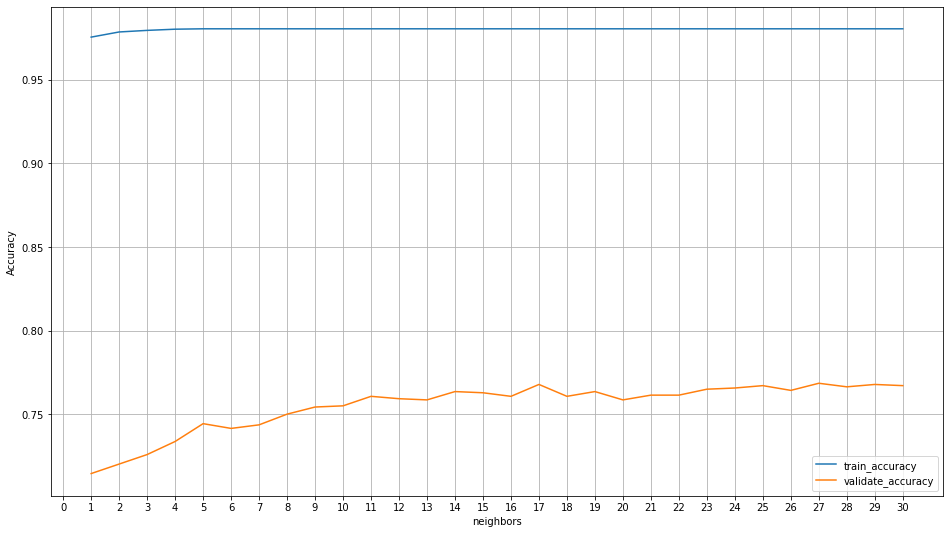

In [120]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [115]:
# default settings and full features, best model is 16 neighbors (train=80, val = 79)
# removing columns had better accuracy as neighbors approached 20, but overall reduced accuracy (78 , 76)
# changing weights to 'distance' overfit the model throughout the range of neighbors (train 98, val 76)